### Exploratory Data Analysis (EDA) OF Attrition Dataset

ATTRITION: Attrition is the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement.

Brief Description of the Attrition Dataset: This is a fictional data set created by IBM data scientists. The dataset used for this analysis was obtained from Kaggle and can be found here <a href="https://drive.google.com/file/d/13cdx4kWB6-WZe1VTjPqnFRgYzzGZHt2x/view?usp=sharing">attr_data.db</a> Python and other libraries including pandas, matplotlib, and seaborn was used to obtain insights on factors which contribute to employee attrition.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import sqlite3
from typing import List, Tuple, Dict, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Built-in library
import itertools
import re
import json
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
conn = sqlite3.connect("attr_data.db")
cursor = conn.cursor()

Loading Data and Display

In [3]:
sql_query = """
              SELECT * FROM 'attrition_records'
"""
IBM = pd.read_sql(sql_query, conn)
IBM

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [4]:
# Making a copy of IBM data
IBM_1 = IBM.copy()

In [5]:
# No of rows and columns in dataset
IBM_1.shape

(1470, 36)

In [6]:
# Datatype of all variables
IBM_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [7]:
# Displaying all columns in the dataset
IBM_1.columns

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# Checking for the total number of unique values of all columns
Unique_IBM = IBM_1.nunique().sort_values(ascending=False)
Unique_IBM

id                          1470
EmployeeNumber              1470
MonthlyRate                 1427
MonthlyIncome               1349
DailyRate                    886
HourlyRate                    71
Age                           43
TotalWorkingYears             40
YearsAtCompany                37
DistanceFromHome              29
YearsInCurrentRole            19
YearsWithCurrManager          18
YearsSinceLastPromotion       16
PercentSalaryHike             15
NumCompaniesWorked            10
JobRole                        9
TrainingTimesLastYear          7
EducationField                 6
JobLevel                       5
Education                      5
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
WorkLifeBalance                4
EnvironmentSatisfaction        4
RelationshipSatisfaction       4
BusinessTravel                 3
Department                     3
MaritalStatus                  3
PerformanceRating              2
OverTime  

In [9]:
# Check for the total number missing values
IBM_1.isna().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [10]:
# Checking for the total number of duplicates in the dataset
IBM_1.duplicated().sum()

0

In [11]:
# Split into numerical and categorical data
numerical_vars = [var for var in IBM_1.columns if IBM_1[var].dtype != "O"]
categorical_vars = [var for var in IBM_1.columns if IBM_1[var].dtype == "O"]

numerical_vars, categorical_vars

# Observation: 26 variables are integers, while 9 variables are strings.
# (some of the categorical variables are represented in integer format)

(['id',
  'Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 ['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'])

# Attrition Percentage

In [12]:
IBM_COUNT = IBM_1["Attrition"].value_counts()
# Create DF and reset index
IBM_COUNT = (
    pd.DataFrame(IBM_COUNT)
    .reset_index()
    .rename(columns={"index": "Attrition", "Attrition": "Count"})
)
IBM_COUNT

,Attrition,Count
0,No,1233
1,Yes,237


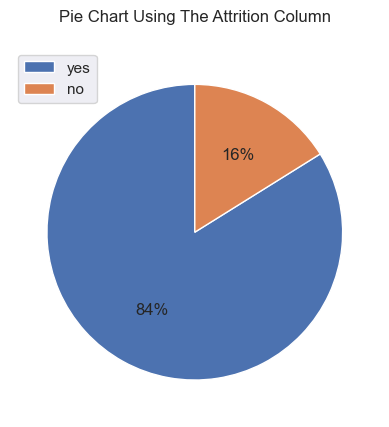

'16% the employees resigned/retired'

In [13]:
answer = IBM_1["Attrition"].value_counts()
label = ["yes", "no"]
plt.pie(answer, autopct="%1.0f%%", startangle=90)
plt.title("Pie Chart Using The Attrition Column\n")
plt.legend(label, loc="best")
plt.show()

("{:.0f}% the employees resigned/retired").format(
    IBM_1["Attrition"].value_counts()["Yes"] / len(IBM_1["Attrition"]) * 100
)

• What do you think are the 3 factors behind employee attrition?

In [14]:
IBM_2 = IBM_1.copy()
IBM_2

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [15]:
IBM_2["Attrition"] = IBM_2["Attrition"].astype("category").cat.codes
IBM_2["BusinessTravel"] = IBM_2["BusinessTravel"].astype("category").cat.codes
IBM_2["Department"] = IBM_2["Department"].astype("category").cat.codes
IBM_2["EducationField"] = IBM_2["EducationField"].astype("category").cat.codes
IBM_2["Gender"] = IBM_2["Gender"].astype("category").cat.codes
IBM_2["JobRole"] = IBM_2["JobRole"].astype("category").cat.codes

IBM_2["MaritalStatus"] = IBM_2["MaritalStatus"].astype("category").cat.codes
IBM_2["Over18"] = IBM_2["Over18"].astype("category").cat.codes
IBM_2["OverTime"] = IBM_2["OverTime"].astype("category").cat.codes
IBM_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        1470 non-null   int64
 1   Age                       1470 non-null   int64
 2   Attrition                 1470 non-null   int8 
 3   BusinessTravel            1470 non-null   int8 
 4   DailyRate                 1470 non-null   int64
 5   Department                1470 non-null   int8 
 6   DistanceFromHome          1470 non-null   int64
 7   Education                 1470 non-null   int64
 8   EducationField            1470 non-null   int8 
 9   EmployeeCount             1470 non-null   int64
 10  EmployeeNumber            1470 non-null   int64
 11  EnvironmentSatisfaction   1470 non-null   int64
 12  Gender                    1470 non-null   int8 
 13  HourlyRate                1470 non-null   int64
 14  JobInvolvement            1470 non-null 

In [16]:
corr = IBM_2.corr("pearson")
plt.figure(figsize=(10, 10))
corr

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,1.000000,-0.010349,-0.010369,-0.015810,-0.051484,-0.010365,0.032928,0.041901,-0.002457,NaN,0.999906,0.017424,0.022075,0.034754,-0.007105,-0.018041,-0.010015,-0.045941,-0.008587,-0.014377,0.012355,-0.000689,NaN,-0.024250,-0.013369,-0.020675,-0.069654,NaN,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
Age,-0.010349,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,NaN,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.010369,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,NaN,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.015810,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,NaN,0.016543,-0.029377,-0.026341,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,-0.051484,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.010365,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,NaN,0.007481,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,0.032928,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.041901,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,NaN,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.002457,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,NaN,0.002259,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1000x1000 with 0 Axes>

In [17]:
abs(corr)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,1.000000,0.010349,0.010369,0.015810,0.051484,0.010365,0.032928,0.041901,0.002457,NaN,0.999906,0.017424,0.022075,0.034754,0.007105,0.018041,0.010015,0.045941,0.008587,0.014377,0.012355,0.000689,NaN,0.024250,0.013369,0.020675,0.069654,NaN,0.062452,0.014095,0.023907,0.010740,0.011557,0.008853,0.009151,0.009432
Age,0.010349,1.000000,0.159205,0.024751,0.010661,0.031882,0.001686,0.208034,0.040873,NaN,0.010145,0.010146,0.036311,0.024287,0.029820,0.509604,0.122427,0.004892,0.095029,0.497855,0.028051,0.299635,NaN,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,0.019621,0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.010369,0.159205,1.000000,0.000074,0.056652,0.063991,0.077924,0.031373,0.026846,NaN,0.010577,0.103369,0.029453,0.006846,0.130016,0.169105,0.067151,0.103481,0.162070,0.159840,0.015170,0.043494,NaN,0.246118,0.013478,0.002889,0.045872,NaN,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
BusinessTravel,0.015810,0.024751,0.000074,1.000000,0.004086,0.009044,0.024469,0.000757,0.023724,NaN,0.015578,0.004174,0.032981,0.026528,0.039062,0.019311,0.002724,0.033962,0.024001,0.034319,0.014107,0.020875,NaN,0.016543,0.029377,0.026341,0.035986,NaN,0.016727,0.034226,0.015240,0.011256,0.014575,0.011497,0.032591,0.022636
DailyRate,0.051484,0.010661,0.056652,0.004086,1.000000,0.007109,0.004985,0.016806,0.037709,NaN,0.050990,0.018355,0.011716,0.023381,0.046135,0.002966,0.009472,0.030571,0.069586,0.007707,0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,0.037848,0.034055,0.009932,0.033229,0.026363
Department,0.010365,0.031882,0.063991,0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,0.010895,0.019395,0.041583,0.004144,0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,0.035882,NaN,0.007481,0.007840,0.024604,0.022414,NaN,0.012193,0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,0.032928,0.001686,0.077924,0.024469,0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,0.016075,0.001851,0.031131,0.008783,0.005303,0.001015,0.003669,0.014437,0.017014,0.027473,0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,0.036942,0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.041901,0.208034,0.031373,0.000757,0.016806,0.007996,0.021042,1.000000,0.039592,NaN,0.042070,0.027128,0.016547,0.016775,0.042438,0.101589,0.004236,0.011296,0.004053,0.094961,0.026084,0.126317,NaN,0.020322,0.011111,0.024539,0.009118,NaN,0.018422,0.148280,0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.002457,0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,0.039592,1.000000,NaN,0.002516,0.043163,0.002504,0.021941,0.002655,0.044933,0.015599,0.034401,0.014420,0.041070,0.027182,0.008663,NaN,0.002259,0.011214,0.005614,0.004378,NaN,0.016185,0.027848,0.049195,0.041191,0.018692,0.010506,0.002326,0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


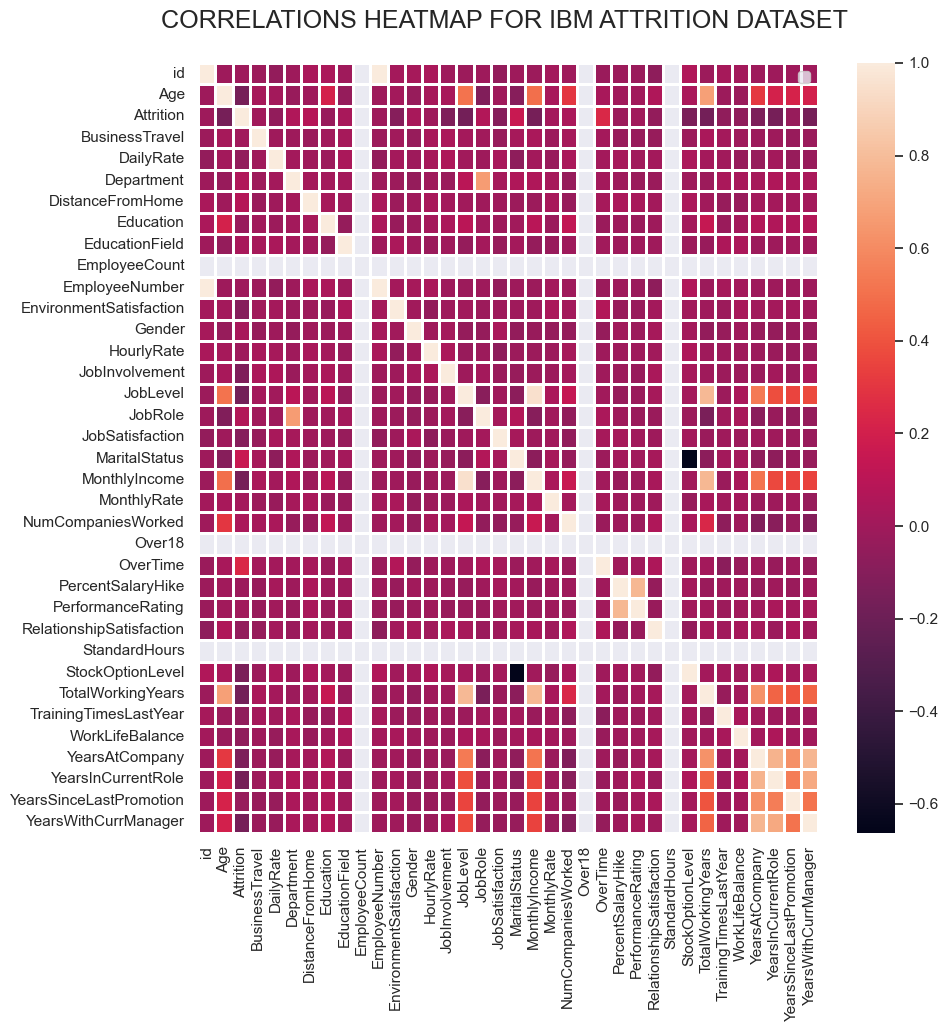

In [18]:
corr = IBM_2.corr("pearson")
plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidth=1)
plt.title(
    "Correlations heatmap for IBM ATTRITION DATASET \n".upper(),
    fontdict={"fontsize": 18},
    loc="center",
)
plt.legend(label, loc="best")
plt.show()

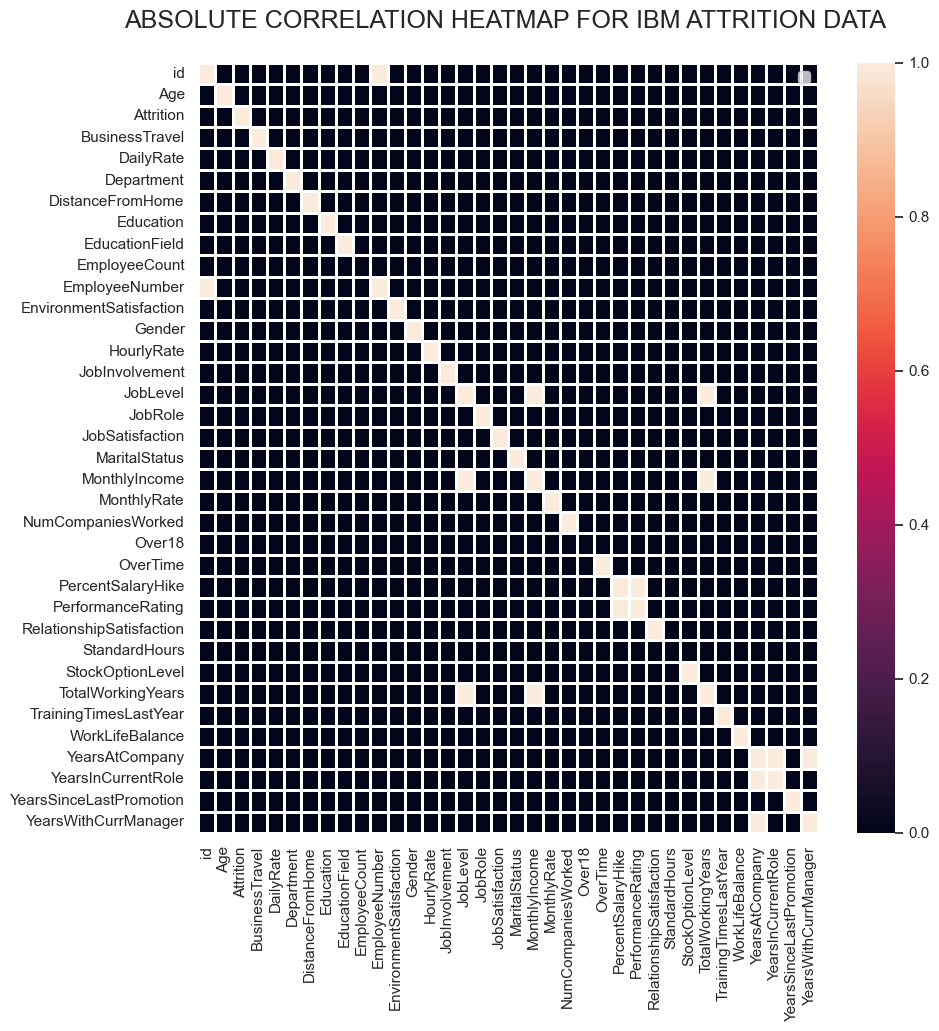

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(abs(corr) > 0.75, linewidth=1)
plt.title(
    "Absolute Correlation heatmap for IBM ATTRITION DATA \n".upper(),
    fontdict={"fontsize": 18},
    loc="center",
)
plt.legend(label, loc="best")
plt.show()

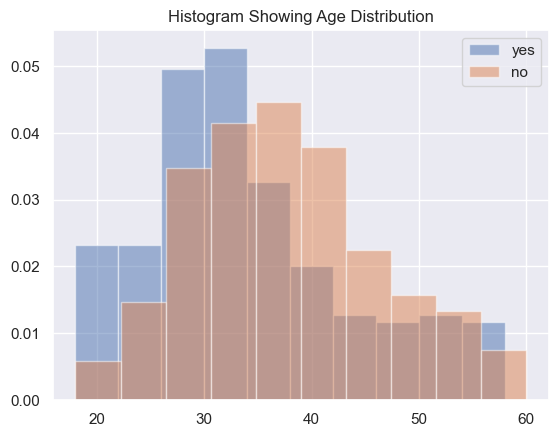

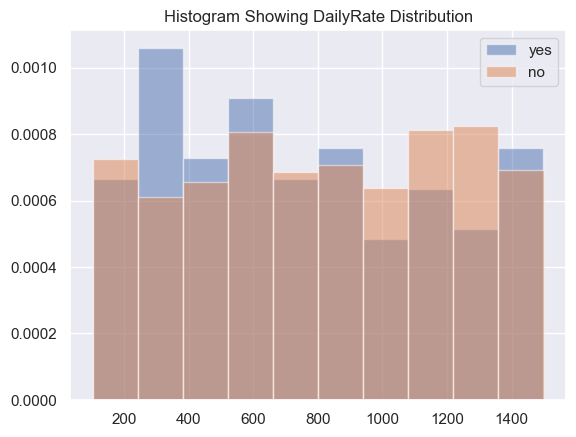

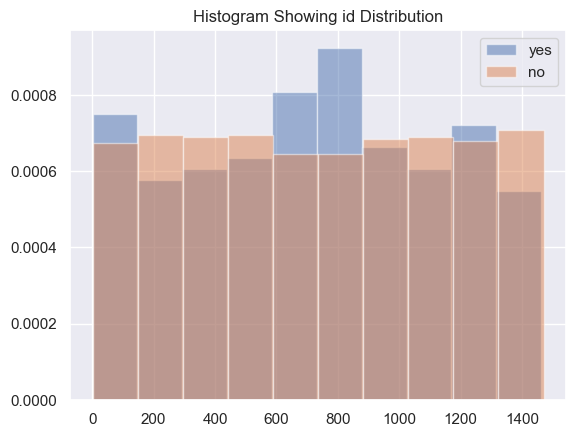

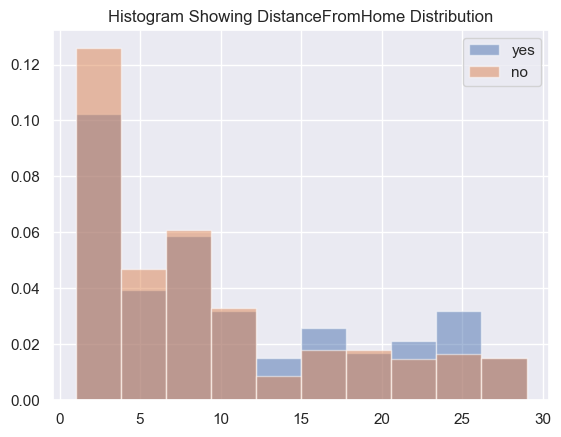

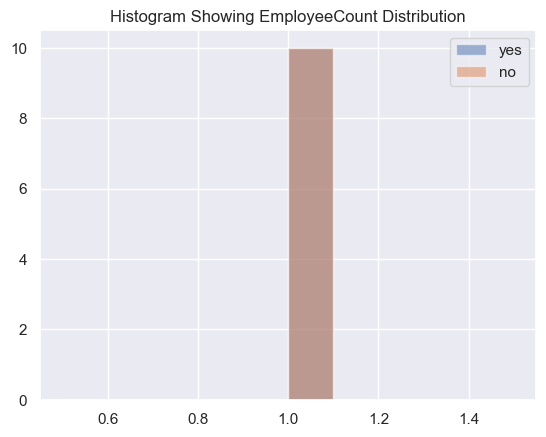

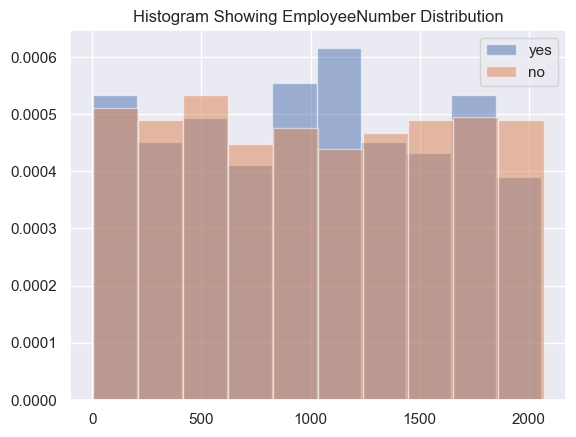

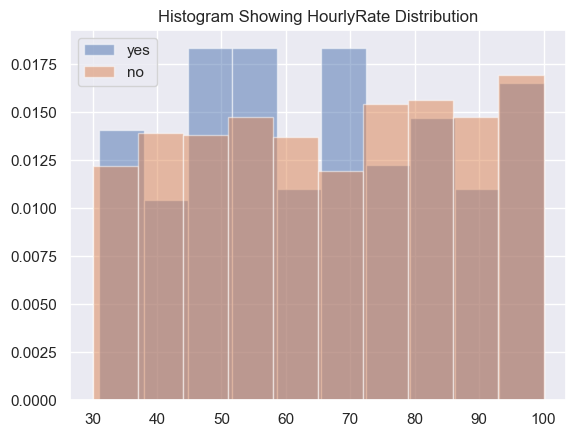

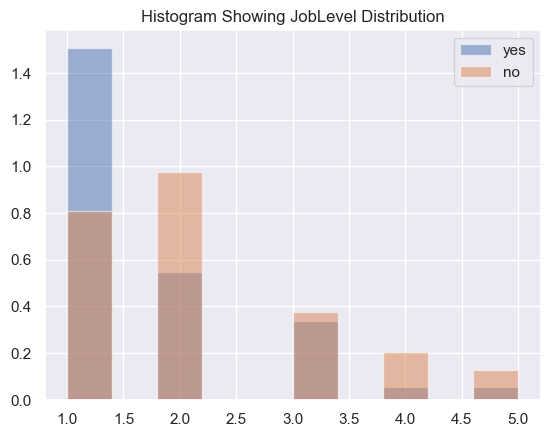

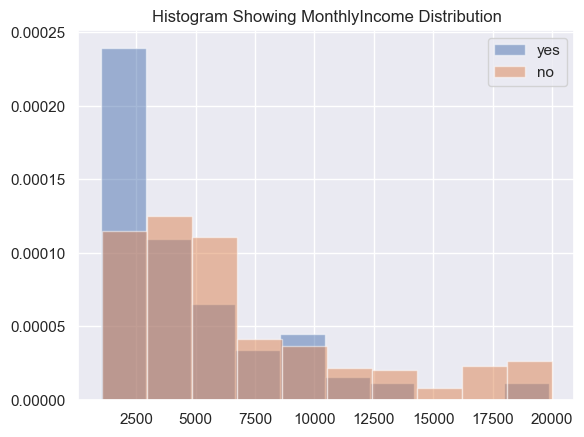

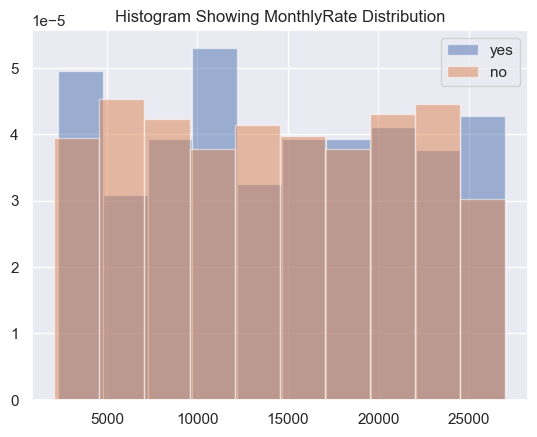

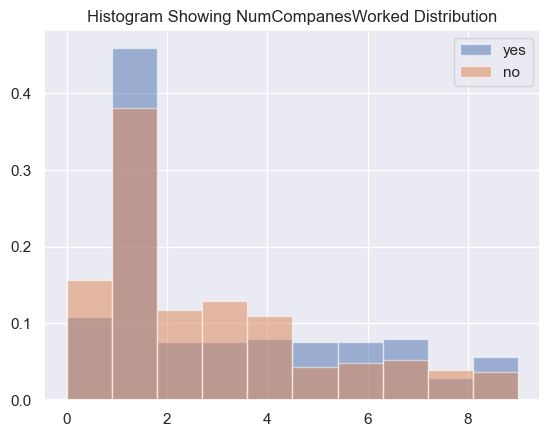

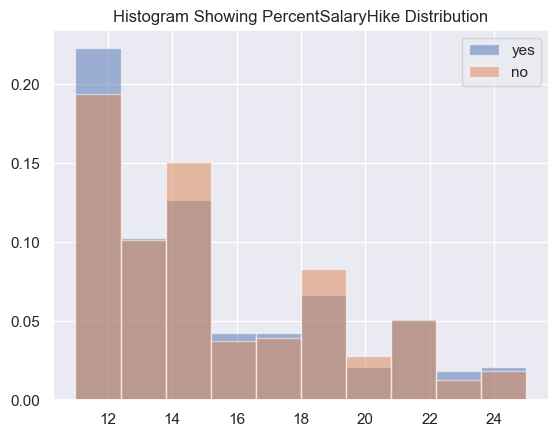

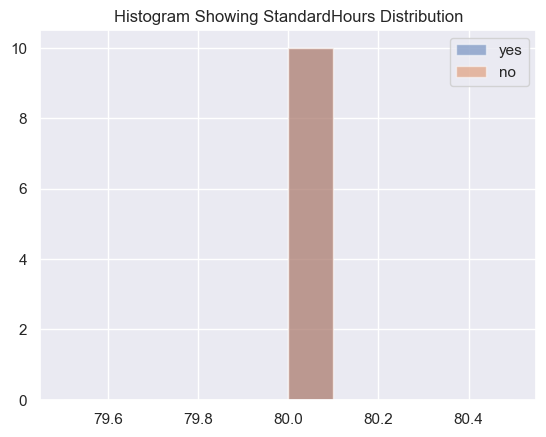

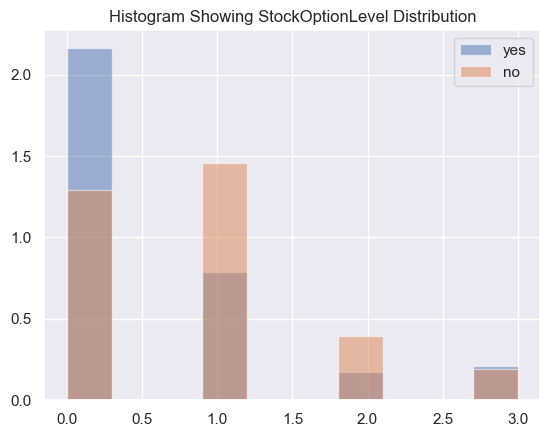

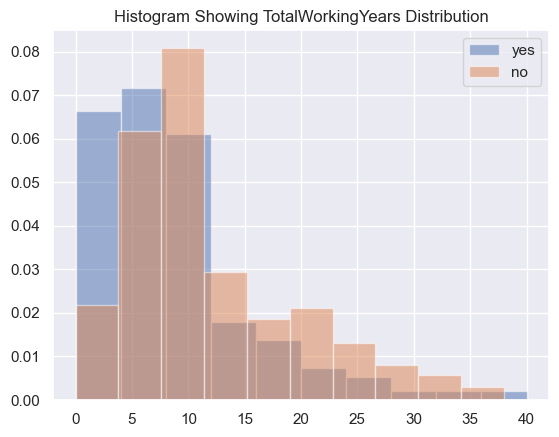

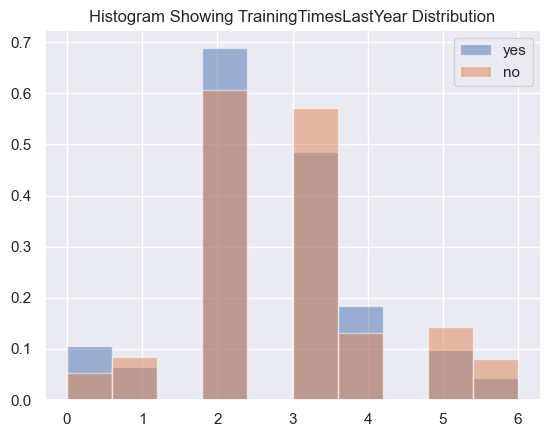

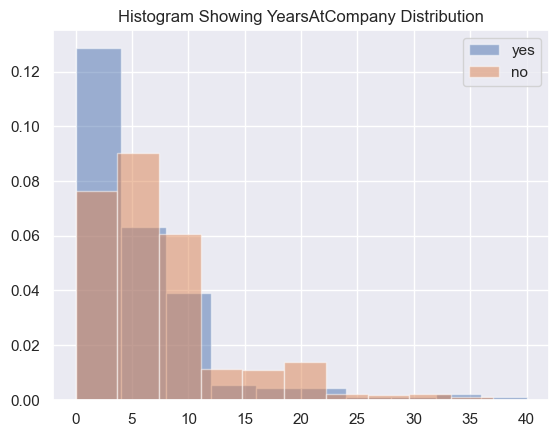

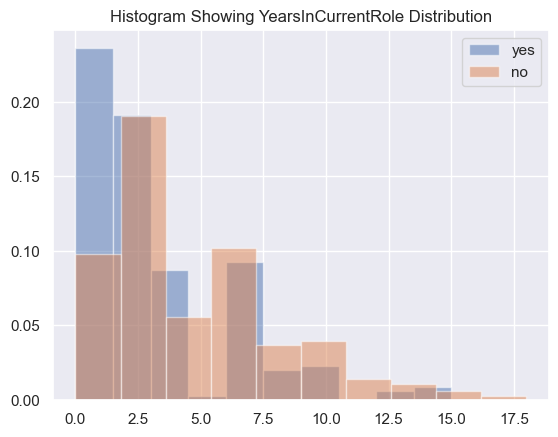

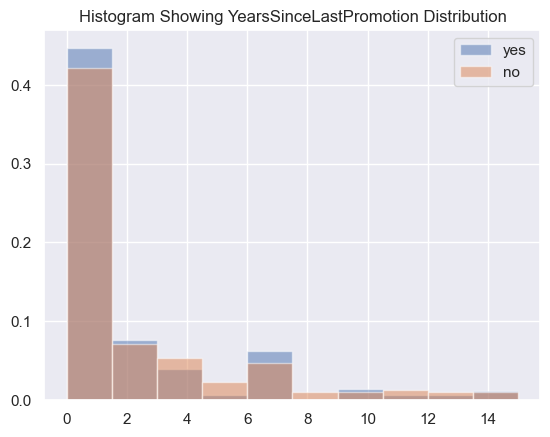

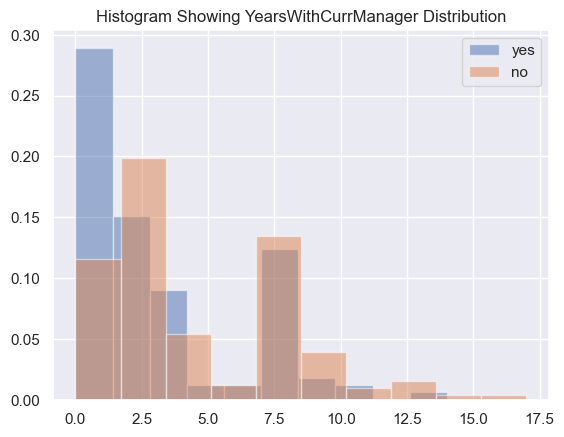

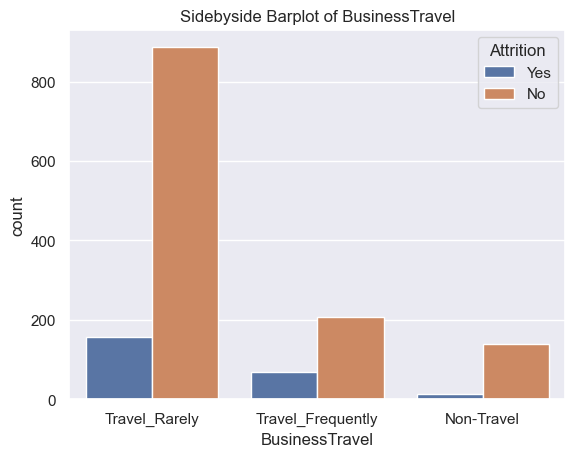

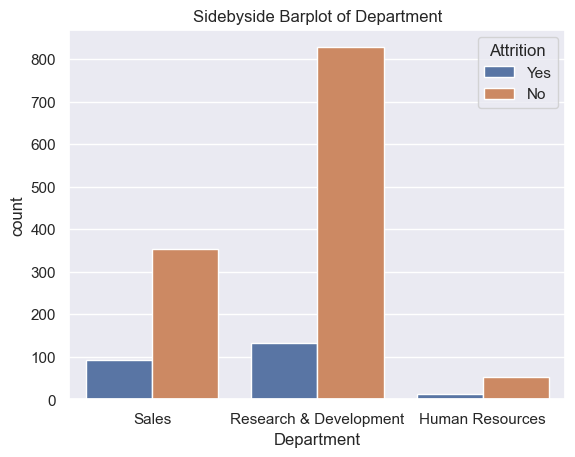

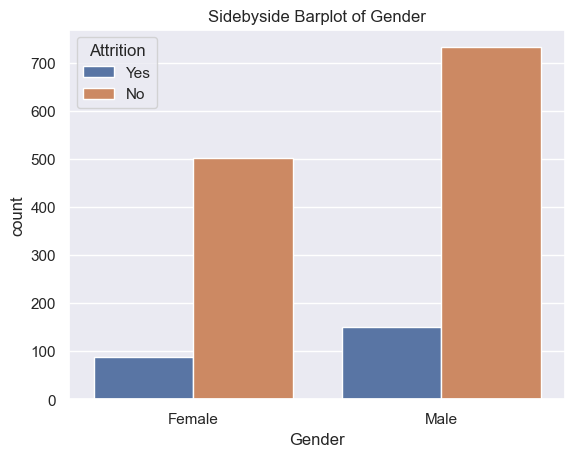

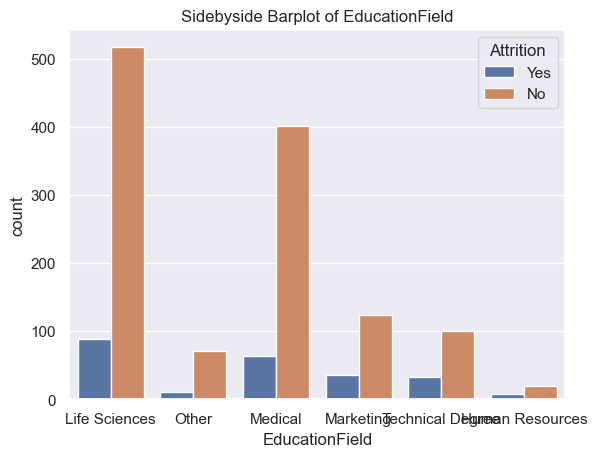

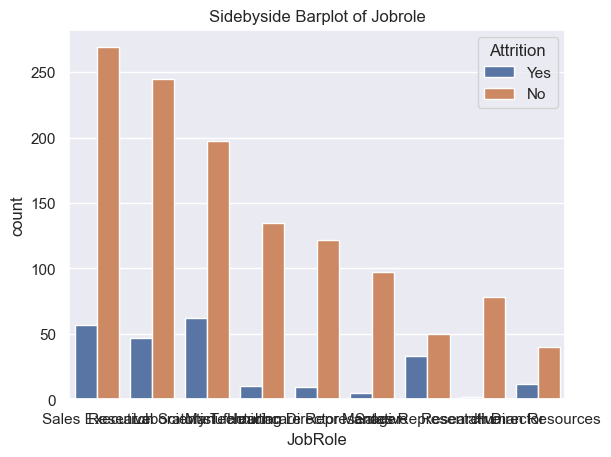

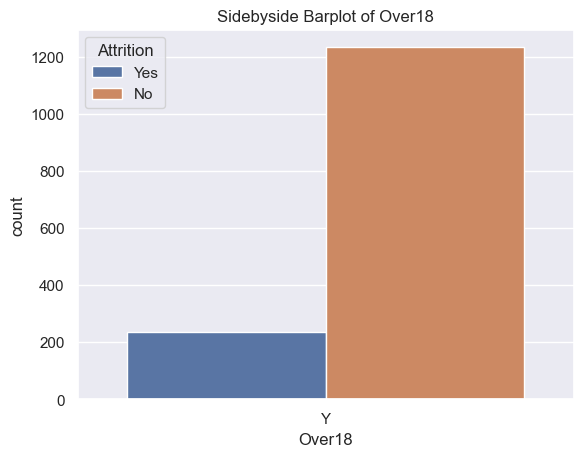

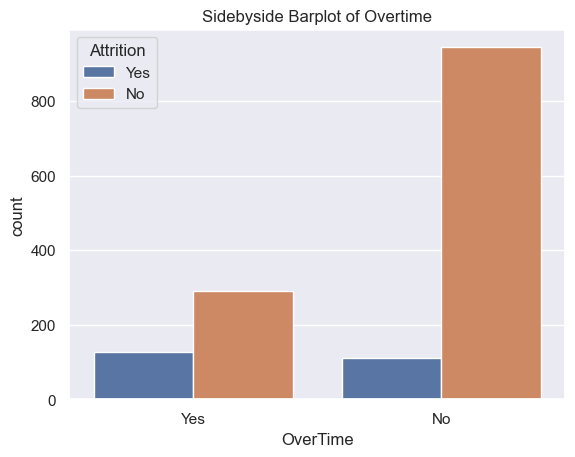

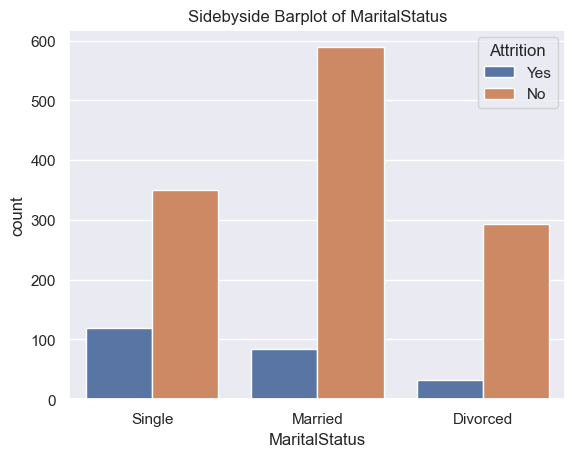

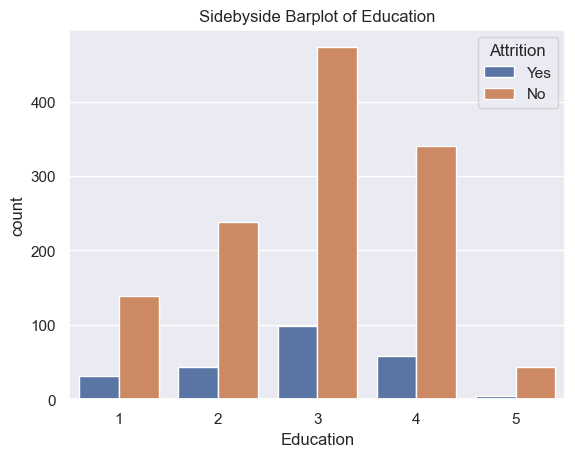

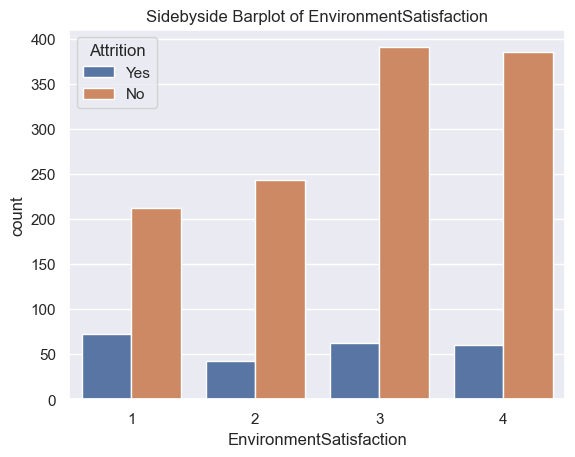

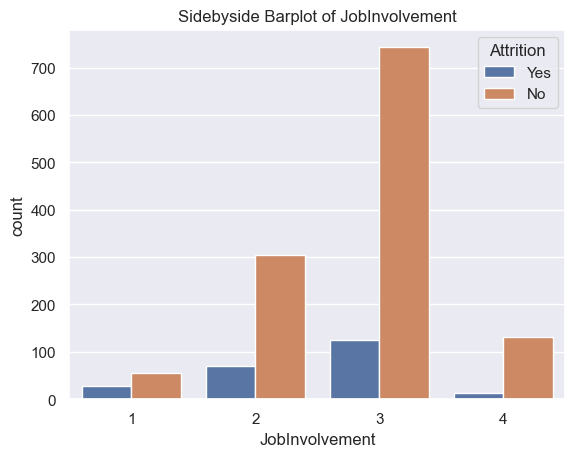

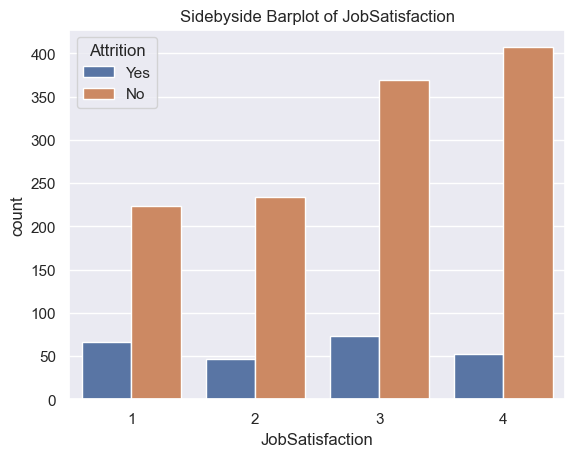

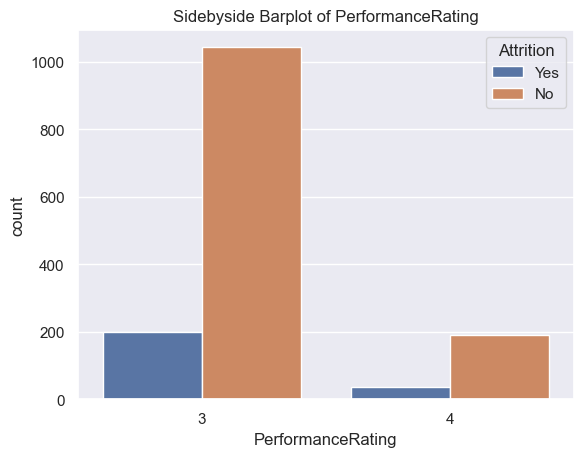

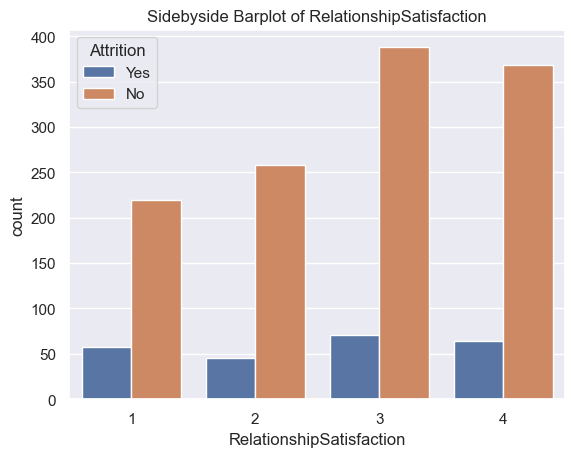

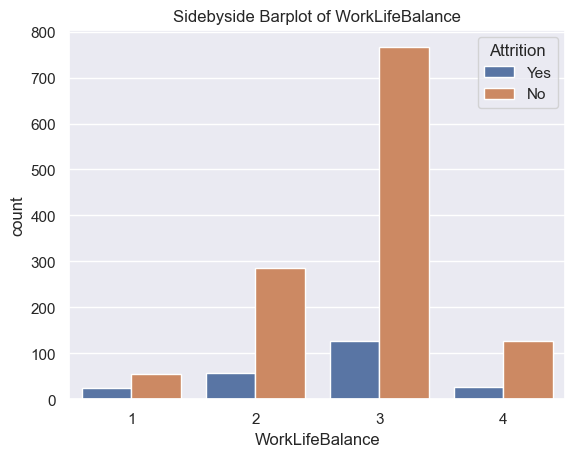

In [20]:
# NUMERICAL DATA
plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["Age"], label="yes", alpha=0.5, density=True
)
plt.hist(IBM_1[IBM_1["Attrition"] == "No"]["Age"], label="no", alpha=0.5, density=True)
plt.legend()
plt.title("Histogram Showing Age Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["DailyRate"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["DailyRate"], label="no", alpha=0.5, density=True
)
plt.legend()
plt.title("Histogram Showing DailyRate Distribution")
plt.show()

plt.hist(IBM_1[IBM_1["Attrition"] == "Yes"]["id"], label="yes", alpha=0.5, density=True)
plt.hist(IBM_1[IBM_1["Attrition"] == "No"]["id"], label="no", alpha=0.5, density=True)
plt.legend()
plt.title("Histogram Showing id Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["DistanceFromHome"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["DistanceFromHome"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing DistanceFromHome Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["EmployeeCount"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["EmployeeCount"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing EmployeeCount Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["EmployeeNumber"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["EmployeeNumber"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing EmployeeNumber Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["HourlyRate"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["HourlyRate"], label="no", alpha=0.5, density=True
)
plt.legend()
plt.title("Histogram Showing HourlyRate Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["JobLevel"], label="yes", alpha=0.5, density=True
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["JobLevel"], label="no", alpha=0.5, density=True
)
plt.legend()
plt.title("Histogram Showing JobLevel Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["MonthlyIncome"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["MonthlyIncome"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing MonthlyIncome Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["MonthlyRate"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["MonthlyRate"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing MonthlyRate Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["NumCompaniesWorked"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["NumCompaniesWorked"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing NumCompanesWorked Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["PercentSalaryHike"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["PercentSalaryHike"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing PercentSalaryHike Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["StandardHours"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["StandardHours"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing StandardHours Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["StockOptionLevel"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["StockOptionLevel"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing StockOptionLevel Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["TotalWorkingYears"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["TotalWorkingYears"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing TotalWorkingYears Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["TrainingTimesLastYear"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["TrainingTimesLastYear"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing TrainingTimesLastYear Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["YearsAtCompany"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["YearsAtCompany"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing YearsAtCompany Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["YearsInCurrentRole"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["YearsInCurrentRole"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing YearsInCurrentRole Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["YearsSinceLastPromotion"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["YearsSinceLastPromotion"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing YearsSinceLastPromotion Distribution")
plt.show()

plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["YearsWithCurrManager"],
    label="yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["YearsWithCurrManager"],
    label="no",
    alpha=0.5,
    density=True,
)
plt.legend()
plt.title("Histogram Showing YearsWithCurrManager Distribution")
plt.show()

# CATEGORICAL DATA
sns.countplot(x="BusinessTravel", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of BusinessTravel")
plt.show()

sns.countplot(x="Department", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of Department")
plt.show()

sns.countplot(x="Gender", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of Gender")
plt.show()

sns.countplot(x="EducationField", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of EducationField")
plt.show()

sns.countplot(x="JobRole", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of Jobrole")
plt.show()

sns.countplot(x="Over18", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of Over18")
plt.show()
sns.countplot(x="OverTime", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of Overtime")
plt.show()

sns.countplot(x="MaritalStatus", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of MaritalStatus")
plt.show()

sns.countplot(x="Education", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of Education")
plt.show()

sns.countplot(x="EnvironmentSatisfaction", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of EnvironmentSatisfaction")
plt.show()

sns.countplot(x="JobInvolvement", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of JobInvolvement")
plt.show()

sns.countplot(x="JobSatisfaction", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of JobSatisfaction")
plt.show()

sns.countplot(x="PerformanceRating", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of PerformanceRating")
plt.show()

sns.countplot(x="RelationshipSatisfaction", hue="Attrition", data=IBM_1)
plt.title("Sidebyside Barplot of RelationshipSatisfaction")
plt.show()

sns.countplot(x="WorkLifeBalance", hue="Attrition", data=IBM_1)


plt.title("Sidebyside Barplot of WorkLifeBalance")
plt.show()

What is the relationship between Education and Monthly Income?

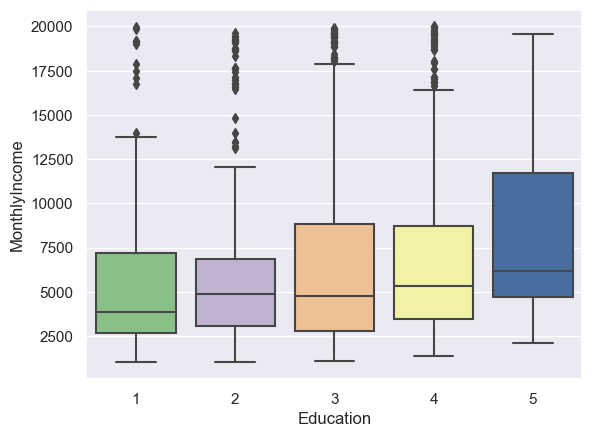

In [21]:
# create a boxplot of monthly income by education
sns.boxplot(x="Education", y="MonthlyIncome", data=IBM_1, palette="Accent")
plt.show()

What is the effect of age on attrition?

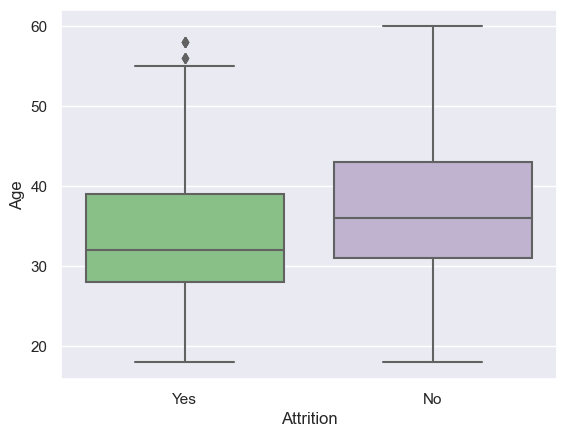

In [22]:
# create a boxplot of Age by Attrition
sns.boxplot(x="Attrition", y="Age", data=IBM_1, palette="Accent")
plt.show()

Is Income the main factor in employee attrition?

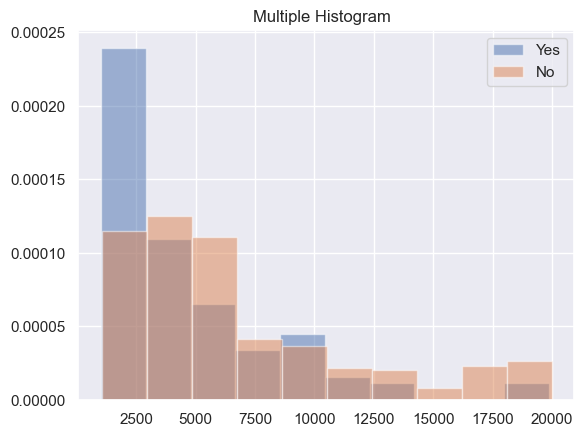

In [23]:
plt.hist(
    IBM_1[IBM_1["Attrition"] == "Yes"]["MonthlyIncome"],
    label="Yes",
    alpha=0.5,
    density=True,
)
plt.hist(
    IBM_1[IBM_1["Attrition"] == "No"]["MonthlyIncome"],
    label="No",
    alpha=0.5,
    density=True,
)
plt.title("Multiple Histogram  ")
plt.legend()
plt.show()

• How does work-life balance impact the overall attrition rate?

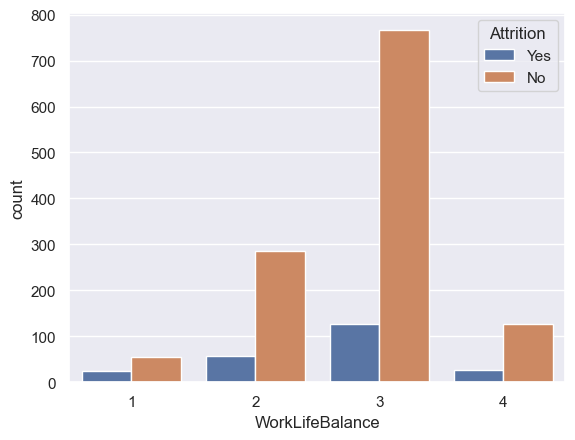

In [24]:
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=IBM_1)
plt.show()

# RESULT OF ANALYSIS 
This is the final step of carrying out the data analysis . 
Here we explain the results of the visualizations, and find out if the defined problems are being solved.

For the attrition dataset, we answer the following questions:

### What do you think are the 3 factors behind employee attrition?
Although, from the exploration of the datasets it can be deduced that there's more than 3 factors behind
employee attrition. This can be deduced via the heatmap which shows the correlation between attrition and every 
other factor in the attrition dataset, also via histograms and sidebyside barplots for each individual
factor to show their relationship with attrition status.
The three most prominent factors which were behind employee attrition included BusinessTravel, Overtime 
and MaritalStatus, while others included PerformanceRating, WorkLifeBalance, EducationField, Department.

BusinessTravel:
For those who travelled rarely, there was way less people with attrition, and exceedingly more people with no attrition.
For those who travelled frequently, there was less people with attrition, and a little more people with no attrition, which was very few compared to those who travelled rarely.
For those who did not travel, there was very minimal people with attrition, and more people with no attrition, which was also few.

Overtime:
For those with overtime, there was less people with attrition than no attrition.
For those with no overtime, there was excessive people with no attrition compared to those with overtime; and about the same amount of people with attrition as those with overtime.

MaritalStatus:
For the single people, there was higher rate of no attrition than those with attrition.
For the divorced people, there was also a higher rate of no attrition than those with attrition, but compared to the single people they had very lower no of people with attrition.
For the married people, they had the highest rate of no attrition which greatly exceeded that of single and divorced people, and a lesser no of people with attrition which was close to those of single people.

These contribute to the conclusion that BusinessTravel, Overtme and MaritalStatus are behind employee attrition

### What is the relationship between Education and Monthly Income?
From the boxplots, it can be deduced that with each increasing education level, there is a linear average increase 
in the monthly income. Those with EducationLevel 5(Doctor) have the largest income range, while those with EducationLevel 2(College)
have the lowest income range. This shows that educational level is directly proportional to the monthly income.Those with education level 2 (college) have the most outliers, while those with EducationLevel 5(Doctor) have widest range with no outliers.

### What is the effect of age on attrition?
There is a slight effect of age on attrition. As seen from the boxplot, a lower age range approximately between (28 & 40), had attrition status of YES, while those between the age range of approximately(31 & 43) had attrition status of NO.

### Is Income the main factor in employee attrition?
NO, income is not the main factor in employee attrition. This is because there isn't much difference in attrition status between those who earned above 2500.

### How does work-life balance impact the overall attrition rate?
There is a linear increase in rate of attrition status as either YES or NO,following an increase in WorkLifeBalance from 1-3(bad, to good, to better). At WorkLifeBalance value of 4 (best), attrition status as either YES or NO decreases steeply. Hence, there is fundamental impact of WorkLifeBalance on overall attrition rate.